# <a id='toc1_'></a>[<span style="color:yellow;">Musical Notes</span>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<span style="color:yellow;">Musical Notes</span>](#toc1_)    
- [Step 1: 💁 Scientific Pitch Notation 💁 (SPN)](#toc2_)    
  - [Step 1.1: Octave](#toc2_1_)    
  - [Step 1.2: Pitch](#toc2_2_)    
  - [Step 1.3: SPN](#toc2_3_)    
- [Step 2: Import Required Libraries](#toc3_)    
  - [Step 2.1: Import core libraries](#toc3_1_)    
  - [Step 2.2: Import functions from 😊 our 😊 module](#toc3_2_)    
  - [Step 2.3: Configure plotting](#toc3_3_)    
- [Step 3: Define Musical Notes and Their Frequencies](#toc4_)    
  - [Step 3.1: Create a dictionary](#toc4_1_)    
  - [Step 3.2: Note frequencies](#toc4_2_)    
  - [Step 3.3: Visualize note frequencies](#toc4_3_)    
  - [Step 3.4: Explain key observations](#toc4_4_)    
  - [Step 3.5: 💁💁💁 Mathematical Explanation](#toc4_5_)    
- [Step 4: 👋 Reflection 👋](#toc5_)    
  - [Step 4.1: Why pitch (frequency) dominates](#toc5_1_)    
  - [Step 4.2: Why loudness depends on the envelope, not instantaneous amplitude](#toc5_2_)    
  - [Step 4.3: Why phase is irrelevant](#toc5_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Step 1: 💁 Scientific Pitch Notation 💁 (SPN)](#toc0_)

## <a id='toc2_1_'></a>[Step 1.1: Octave](#toc0_)

<img src=Image/Scientific_pitch_notation_octaves_of_C.png width=450>

![](Image/3MiddleOctaves-V3.webp)

## <a id='toc2_2_'></a>[Step 1.2: Pitch](#toc0_)

<img src='Image/Integer-Circle.001.png' width=400>
https://davidkulma.com/musictheory/integers

## <a id='toc2_3_'></a>[Step 1.3: SPN](#toc0_)

- Scientific Pitch Notation is the most widely used system to define a pitch’s pitch class (the "letter name," e.g., C, D, E) and octave (its "height," e.g., 4, 5). 
- It solves ambiguity—for example, "C" alone could mean a low C or a high C, but "C4" specifies exactly one pitch.
- SPN has two key parts, plus optional accidentals (sharps/flats) to adjust pitch

<table>
  <tr>
    <th>Component</th>
    <th>Explanation</th>
  </tr>
  <tr>
    <td><strong>Pitch Class</strong></td>
    <td>7 basic letter names: C, D, E, F, G, A, B (these repeat in every octave).</td>
  </tr>
  <tr>
    <td><strong>Octave Number</strong></td>
    <td>A number (0 to 10+) that labels the octave range. <br>Higher numbers = higher pitch.</td>
  </tr>
  <tr>
    <td><strong>Accidentals</strong></td>
    <td>Optional symbols to raise/lower pitch:<br>- ♯ (sharp): raises by 1 half-step (e.g., C♯4)<br>- ♭ (flat): lowers by 1 half-step (e.g., D♭4)<br>- ♮ (natural): cancels a sharp/flat (e.g., E♮5)</td>
  </tr>
</table>

# <a id='toc3_'></a>[Step 2: Import Required Libraries](#toc0_)

## <a id='toc3_1_'></a>[Step 2.1: Import core libraries](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from IPython.display import Audio
import librosa  # For converting musical note names to frequencies (uses standard A4=440Hz tuning)

ModuleNotFoundError: No module named 'librosa'

## <a id='toc3_2_'></a>[Step 2.2: Import functions from 😊 our 😊 module](#toc0_)

In [ ]:
from audio_visualization import (
    generate_note,
    plot_time_segment,
    plot_signal_and_fft,
    get_note_frequencies,
    get_peak_amplitude
)

## <a id='toc3_3_'></a>[Step 2.3: Configure plotting](#toc0_)

In [ ]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")

# <a id='toc4_'></a>[Step 3: Define Musical Notes and Their Frequencies](#toc0_)

## <a id='toc4_1_'></a>[Step 3.1: Create a dictionary](#toc0_)
of common musical notes and their frequencies
Using $$A4 = 440$$ Hz as reference (`standard tuning`)

In [ ]:
# Define notes of interest and get their frequencies
notes_list = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5']
notes = get_note_frequencies(notes_list)  # Reuse module function

## <a id='toc4_2_'></a>[Step 3.2: Note frequencies](#toc0_)

In [ ]:
for note, freq in notes.items():
    print(f"{note}: {freq:.2f} Hz")

C4: 261.63 Hz
D4: 293.66 Hz
E4: 329.63 Hz
F4: 349.23 Hz
G4: 392.00 Hz
A4: 440.00 Hz
B4: 493.88 Hz
C5: 523.25 Hz
D5: 587.33 Hz


## <a id='toc4_3_'></a>[Step 3.3: Visualize note frequencies](#toc0_)
A visual representation helps understand the relationship between musical notes and their frequencies.

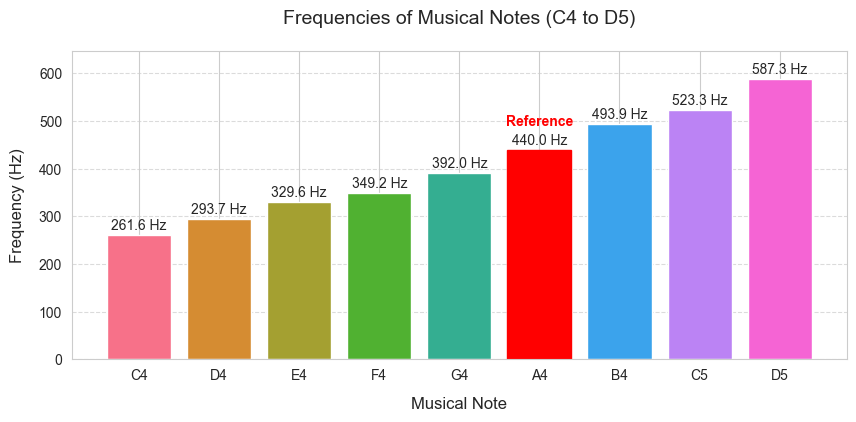

In [ ]:
freqs_list = list(notes.values())

plt.figure(figsize=(10, 4))
bars = plt.bar(notes_list, freqs_list, color=sns.color_palette("husl", len(notes)))

# Add frequency labels
for bar, freq in zip(bars, freqs_list):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{freq:.1f} Hz', ha='center', va='bottom', fontsize=10)

# Highlight A4 reference
a4_index = notes_list.index('A4')
bars[a4_index].set_color('red')
plt.text(a4_index, freqs_list[a4_index] * 1.1, 'Reference', 
         ha='center', va='bottom', color='red', fontweight='bold')

plt.title('Frequencies of Musical Notes (C4 to D5)', fontsize=14, pad=20)
plt.xlabel('Musical Note', fontsize=12, labelpad=10)
plt.ylabel('Frequency (Hz)', fontsize=12, labelpad=10)
plt.ylim(0, max(freqs_list) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <a id='toc4_4_'></a>[Step 3.4: Explain key observations](#toc0_)
Highlight important takeaways to reinforce understanding of musical frequencies.

In [ ]:
print("\nNote about the visualization:")
print("- Red bar: A4 (440 Hz), the global tuning reference")
print("- Frequency increases rightward (C4 → D4 → ... → D5)")
print("- Spacing follows musical intervals (logarithmic, not linear)")


Note about the visualization:
- Red bar: A4 (440 Hz), the global tuning reference
- Frequency increases rightward (C4 → D4 → ... → D5)
- Spacing follows musical intervals (logarithmic, not linear)


## <a id='toc4_5_'></a>[Step 3.5: 💁💁💁 Mathematical Explanation](#toc0_)

Notice that `C5` is exactly double the frequency of `C4` 
octave relationship: 2× frequency = 1 octave higher

Let:
- $f_n$ = frequency of a note in octave $n$
- $f_{n+k}$ = frequency of the same note $k$ octaves higher
The relationship is:$$\boxed{f_{n+k} = f_n \times 2^k}$$

Explanation:
- When $k = 1$ (one octave higher), the formula simplifies to 
$$f_{n+1} = f_n \times 2,$$
which matches the example of $C5 = 2 \times C4$.
- For $k = 2$ (two octaves higher), the frequency quadruples: 
$$f_{n+2} = f_n \times 2^2 = f_n \times 4.$$
- For $k = -1$ (one octave lower), the frequency is halved: 
$$f_{n-1} = f_n \times 2^{-1} = \frac{f_n}{2}.$$

This exponential relationship is fundamental to music theory and acoustics, defining the `logarithmic spacing of frequencies` in musical scales. 

For example, if middle C (C4) has a frequency of ~261.63 Hz, then:
- C5 (one octave higher) = 261.63 × 2¹ = ~523.25 Hz
- C6 (two octaves higher) = 261.63 × 2² = ~1046.50 Hz
- C3 (one octave lower) = 261.63 × 2⁻¹ = ~130.81 Hz

# <a id='toc5_'></a>[Step 4: 👋 Reflection 👋](#toc0_)

The human auditory system’s selective sensitivity to pitch and loudness, rather than phase or instantaneous oscillations, can be grounded in both `biological filtering` and the `mathematical properties` of sound waves. 

To unpack this, let’s formalize key concepts:  

A sound wave can be mathematically represented as a sum of `sinusoidal components` (via `Fourier analysis`), each with a specific frequency $ f $, amplitude $ A $, and phase $ \phi $:  

$$s(t) = \sum_{n=1}^{N} A_n \sin(2\pi f_n t + \phi_n)$$

Here, 

- $ t $ is time, 
- $ A_n $ is the `amplitude` of the $ n $-th component, 
- $ f_n $ is its frequency, 
- and $ \phi_n $ (ranging from $ 0 $ to $ 2\pi $) is its phase—describing the wave’s starting position in its cycle.  

## <a id='toc5_1_'></a>[Step 4.1: Why pitch (frequency) dominates](#toc0_)

Pitch perception is tightly linked to the `fundamental frequency` $ f_0 $ of the sound, the lowest frequency in the Fourier series. 

<img src=Image/structures-outer-ear.webp wid=150>

The `cochlea`, acting as a `mechanical Fourier transform`, resonates at specific $ f_n $, converting frequency into neural signals. 

For musical notes, the perceived pitch corresponds to $ f_0 $, with higher harmonics ($ 2f_0, 3f_0, \dots $) shaping timbre but not altering the core pitch. 

This is why a `C4` on a piano and violin, with the same $ f_0 \approx 261.6 \, \text{Hz} $ but different harmonic amplitudes, are recognized as the same note.

## <a id='toc5_2_'></a>[Step 4.2: Why loudness depends on the envelope, not instantaneous amplitude](#toc0_)

`Loudness` correlates with the *root-mean-square (RMS) amplitude* of the `envelope`, a smoothed measure of `intensity over time`, rather than the rapid peaks of $ s(t) $. 

The envelope $ E(t) $ of a sound is the slow-varying magnitude of its amplitude, often computed as:  

$$E(t) = \sqrt{\frac{1}{T} \int_{t-T/2}^{t+T/2} s^2(\tau) \, d\tau}$$

where $ T $ is a window longer than the period of the highest frequency in $ s(t) $ (e.g., tens of milliseconds). 

This averaging filters out rapid oscillations (too fast for neurons to track) and captures the overall "shape" of the sound—like the attack (quick rise) of a drum hit or the sustained decay of a flute note. 

Instantaneous amplitude $ |s(t)| $, which fluctuates at the frequency of the wave (e.g., 440 times per second for `A4`), is irrelevant because the auditory system cannot resolve such fast changes.

## <a id='toc5_3_'></a>[Step 4.3: Why phase is irrelevant](#toc0_)

Phase $ \phi_n $ shifts the timing of peaks and troughs in each sinusoidal component but does not affect $ f_n $ or $ A_n $. 

For example, two waves with the same $ f $ and $ A $ but phases $ \phi $ and $ \phi + \pi $ (opposite phases) have identical frequency and amplitude envelopes:  

$$
A \sin(2\pi f t + \phi) \quad \text{vs.} \quad A \sin(2\pi f t + \phi + \pi) = -A \sin(2\pi f t + \phi)
$$

Their RMS envelopes are identical, and the cochlea responds equally to both, as it encodes frequency and amplitude, not phase. 

Since phase does not alter these behaviorally critical features (pitch, loudness, timbre), evolution favored ignoring it.  

In short, the auditory system evolved to extract the mathematically stable, behaviorally relevant features—frequency ($ f_n $) and envelope ($ E(t) $)

—while discarding phase ($ \phi_n $) and instantaneous oscillations, optimizing for efficient perception of speech, music, and environmental sounds.